In [2]:
import pandas as pd
lien ="tableau_coeff.xlsx"
df = pd.read_excel(lien)

In [3]:
df

,Prix_de_vente,min,max,coeff,Unnamed: 4,Unnamed: 5
0,<20 000,0,20000,6500.000,NaN,NaN
1,20 000 - 30 000,20001,30000,7000.000,NaN,NaN
2,30 001 - 40 000,30001,40000,8500.000,NaN,NaN
3,40 001 - 50 000,40001,50000,0.145,NaN,NaN
4,50 001 - 60 000,50001,60000,0.130,NaN,NaN
5,60 001 - 70 000,60001,70000,0.115,NaN,NaN
6,70 001 - 90 000,70001,90000,0.110,NaN,NaN
7,90 001 - 120 000,90001,120000,0.095,NaN,NaN
8,120 001 - 150 000,120001,150000,0.090,NaN,NaN
9,150 001 - 180 000,150001,180000,0.085,NaN,NaN


In [40]:
# Fonction de calcul
def prix_nv_c(prix_net_vendeur):
    if prix_net_vendeur : 
        for i in range(3, len(df)):
            if prix_net_vendeur >= df['min'][i] and prix_net_vendeur <= df['max'][i]:
                coeff_temp = df['coeff'][i]
                prix_vente_temp = prix_net_vendeur / (1 - df['coeff'][i])
                if prix_net_vendeur / (1 - df['coeff'][i]) >= df['min'][i+1]:
                    prix_vente = prix_net_vendeur / ( 1 - df['coeff'][i+1])
                    coeff = df['coeff'][i+1]
                    return coeff, prix_vente
                else:
                    return coeff_temp, prix_vente_temp
    else : exit

def prix_nv_f(prix_net_vendeur): 
    if prix_net_vendeur : 
        for i in range(0, 2):
            if prix_net_vendeur >= df['min'][i] and prix_net_vendeur <= df['max'][i]:
                fixe_temp = df['coeff'][i]
                prix_vente_temp = prix_net_vendeur + fixe_temp
                if prix_net_vendeur + fixe_temp >= df['min'][i+1]:
                    prix_vente = prix_net_vendeur + df['coeff'][i+1]
                    coeff = df['coeff'][i+1]
                    return coeff, prix_vente
                else:
                    return fixe_temp, prix_vente_temp
        if prix_net_vendeur >= df['min'][2] and prix_net_vendeur <= df['max'][2]: 
            coeff_temp = df['coeff'][2]
            prix_vente_temp = prix_net_vendeur + coeff_temp
            if prix_net_vendeur + coeff_temp >= df['min'][3]:
                    prix_vente = prix_net_vendeur / (1 - df['coeff'][3])
                    coeff = df['coeff'][3]
                    return coeff, prix_vente
            return coeff_temp, prix_vente_temp
    else : exit

def calcul_frais(Coeff, prix_vente):
    if prix_vente <= 40_000 :
        frais = prix_vente + Coeff
        return frais
    else :
        frais = prix_vente * Coeff
        return frais





In [23]:
print(prix_nv_c(45000))



(np.float64(0.13), np.float64(51724.137931034486))


In [ ]:
prix_net_vendeur = 5000
if prix_net_vendeur : 
    prix_net_vendeur = float(prix_net_vendeur)
    print(prix_net_vendeur)
    for i in range(0,3):
        if prix_net_vendeur > df['min'][i] and prix_net_vendeur <= df['max'][i] : 
            fixe = df['coeff'][i]
            print(fixe)
            prix_vente_temp =  prix_net_vendeur + fixe

    for i in range(3, len(df)):
        if prix_net_vendeur > df['min'][i] and prix_net_vendeur <= df['max'][i]:
            coeff_temp = df['coeff'][i]
            prix_vente_temp = prix_net_vendeur / (1 - df['coeff'][i])
            if prix_net_vendeur + (prix_net_vendeur * df['coeff'][i]) > df['min'][i+1]:
                prix_vente = prix_net_vendeur / ( 1 - df['coeff'][i+1])
                coeff = df['coeff'][i+1]
            


5000.0
6500.0
nope


limites net vendeur :  [50000, 53000, 62000, 81000, 109000, 137000, 165000, 212000, 278000, 373000, 468000, 941000, 1418000]
limites prix vente :  [57471.26436781609, 59887.00564971751, 69662.9213483146, 89502.76243093923, 119780.21978021978, 149726.77595628414, 179347.8260869565, 229189.18918918917, 298924.7311827957, 398930.48128342244, 497872.34042553196, 995767.1957671958, 1492631.5789473685]
[-7471.264367816089, -6887.00564971751, -7662.921348314601, -8502.762430939227, -10780.219780219777, -12726.775956284138, -14347.826086956513, -17189.189189189172, -20924.731182795716, -25930.481283422443, -29872.340425531962, -54767.19576719578, -74631.57894736854]


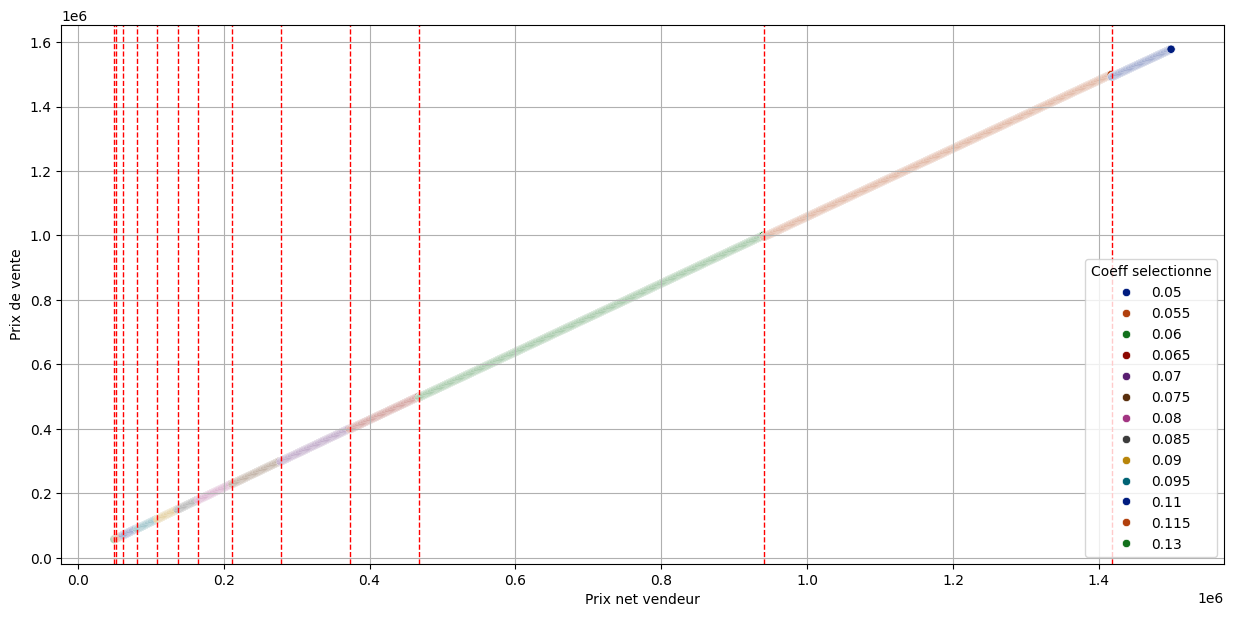

In [56]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


Prix_net_vendeur = []
Coeff_selectionne = []
Prix_de_vente = []
coeff_lim_lst_n = []
coeff_lim_lst_v = []

for i in range(50_000,1_500_000, 1000):
    if i < 31500 :
        Prix_net_vendeur.append(i)
        Coeff_selectionne.append(prix_nv_f(i)[0])
        Prix_de_vente.append(prix_nv_f(i)[1])
    else : 
        Prix_net_vendeur.append(i)
        Coeff_selectionne.append(prix_nv_c(i)[0])
        Prix_de_vente.append(prix_nv_c(i)[1])

df_analyse= pd.DataFrame({
    "Prix net vendeur" : Prix_net_vendeur,
    "Coeff selectionne" : Coeff_selectionne,
    "Prix de vente" : Prix_de_vente,
})

#Calcul de la colonne frais
df_analyse['Frais'] = df_analyse.apply(lambda row : calcul_frais(row['Coeff selectionne'], row['Prix de vente']), axis=1)


#detection du changement de coeff
df_analyse['prix_coeff_lim'] = df_analyse['Coeff selectionne'].ne(df_analyse['Coeff selectionne'].shift(1))

for idx, row in df_analyse.iterrows() :
    if row['prix_coeff_lim'] :
        #print(row['Prix net vendeur'])
        coeff_lim_lst_n.append(row['Prix net vendeur'])
        coeff_lim_lst_v.append(row['Prix de vente'])


plt.figure(figsize=(15,7))
for seuil_n in coeff_lim_lst_n:
    plt.axvline(x=seuil_n, color='red', linestyle='--', linewidth=1)
#for seuil_v in coeff_lim_lst_v:
    #plt.axhline(y=seuil_v, color='red', linestyle='--', linewidth=1)
sns.scatterplot(df_analyse, x= 'Prix net vendeur' , y = 'Prix de vente', hue= 'Coeff selectionne', palette='dark' )
plt.grid(True)

print(f"limites net vendeur : ",coeff_lim_lst_n)
print("limites prix vente : ", coeff_lim_lst_v)

diff_lst = [a - b for a, b in zip(coeff_lim_lst_n, coeff_lim_lst_v)]

print(diff_lst)

In [48]:
df_analyse['Frais']



0        7471.264368
1        7620.689655
2        7770.114943
3        6887.005650
4        7016.949153
            ...     
1445    78684.210526
1446    78736.842105
1447    78789.473684
1448    78842.105263
1449    78894.736842
Name: Frais, Length: 1450, dtype: float64

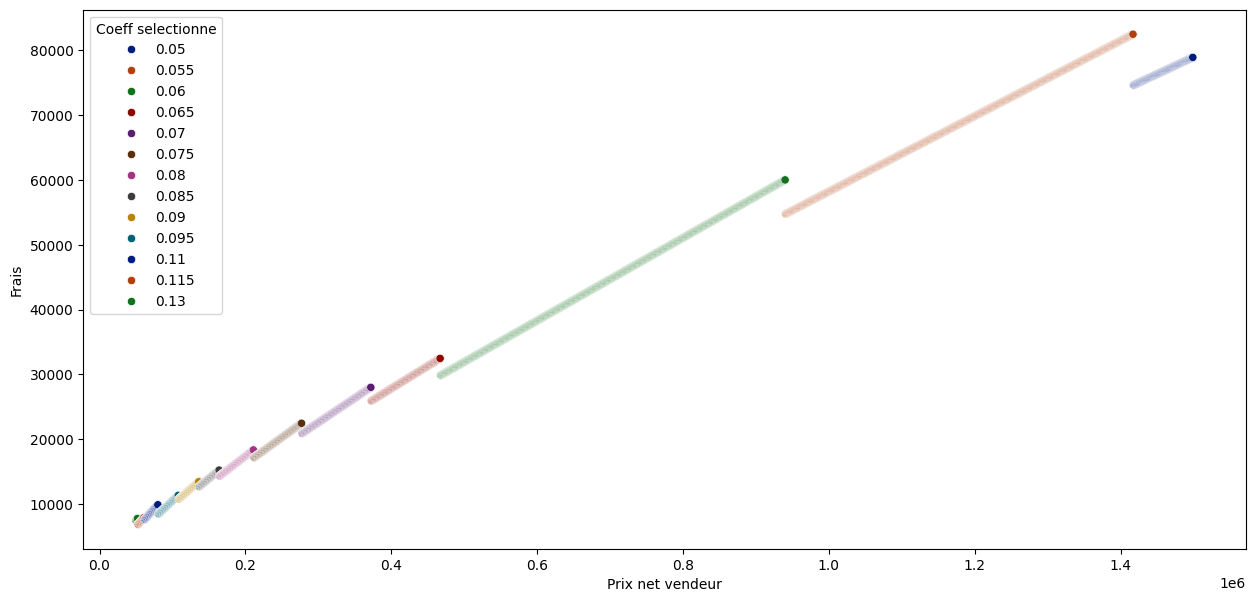

In [64]:
plt.figure(figsize=(15,7))
sns.scatterplot(df_analyse, x = 'Prix net vendeur', y= 'Frais', hue='Coeff selectionne', palette='dark')
plt.show()

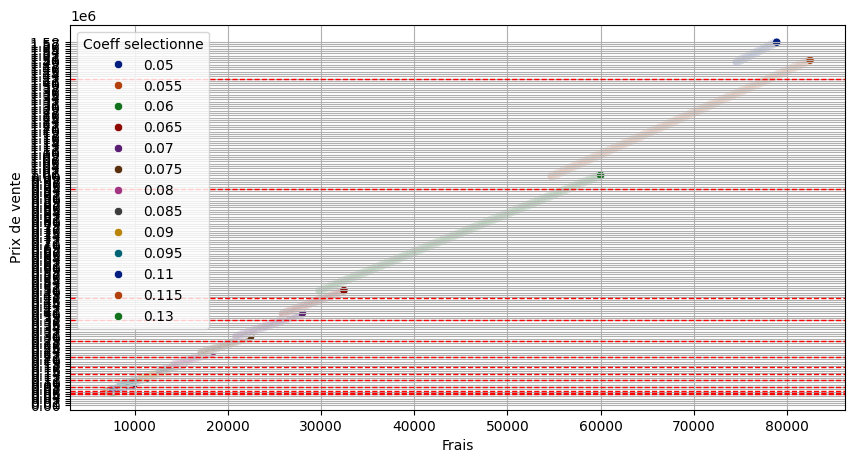

In [57]:
import numpy as np


plt.figure(figsize=(10,5))
sns.scatterplot(df_analyse, x= 'Frais' , y = 'Prix de vente', hue= 'Coeff selectionne', palette='dark' )
for seuil_n in coeff_lim_lst_n:
    plt.axhline(y=seuil_n, color='red', linestyle='--', linewidth=1)
plt.yticks(np.arange(0, df_analyse['Prix de vente'].max() + 10000, 10000))
plt.grid(True)

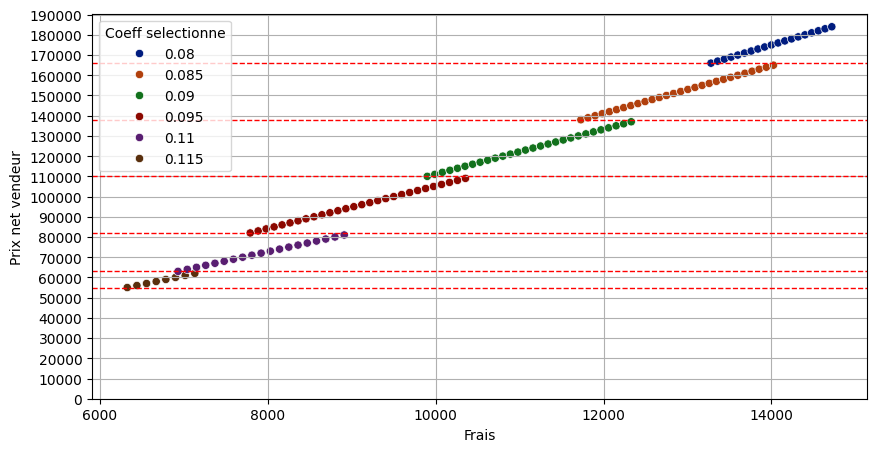

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_analyse, x= 'Frais' , y = 'Prix net vendeur', hue= 'Coeff selectionne', palette='dark' )
for seuil_n in coeff_lim_lst_n:
    plt.axhline(y=seuil_n, color='red', linestyle='--', linewidth=1)
plt.yticks(np.arange(0, df_analyse['Prix net vendeur'].max() + 10000, 10000))
plt.grid(True)